In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
%matplotlib inline
from sklearn.metrics import r2_score

In [21]:
revenue_data = {'Week 1': 2320, 'Week 2': 4280, 'Week 3': 7360, 'Week 4': 5464, 'Week 5': 10968, 'Week 6': 12520, 
                'Week 7': 13544, 'Week 8': 19184, 'Week 9': 25280, 'Week 10': 23200, 'Week 11': 21960, 
                'Week 12': 28216, 'Week 13': 20184}

In [36]:
#converting dictionary to dataframe. 'orient = index' makes the week column the index but 'reset_index()' 
#changes it back to a regular column 
revenue = pd.DataFrame.from_dict(revenue_data, orient = 'index').reset_index()
revenue.columns = ['week', 'weekly_revenue']
revenue

,week,weekly_revenue
0,Week 1,2320
1,Week 2,4280
2,Week 3,7360
3,Week 4,5464
4,Week 5,10968
5,Week 6,12520
6,Week 7,13544
7,Week 8,19184
8,Week 9,25280
9,Week 10,23200


In [38]:
#for regression
x = list(range(1,14))
y = revenue.weekly_revenue

In [40]:
model = np.polyfit(x, y, 1)
predict = np.poly1d(model)

In [41]:
predicted_revenue = predict(x)

Text(0.5, 1.0, 'Weekly revenue')

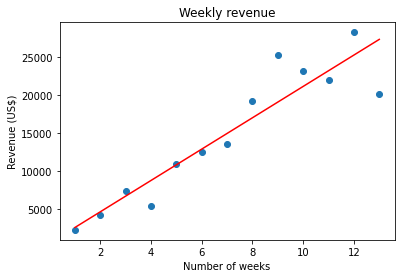

In [46]:
#chart shows existing data and regression line
ax = plt.subplot()
plt.scatter(x, y)
plt.plot(x, predicted_revenue, color = 'red')
plt.xlabel('Number of weeks')
plt.ylabel('Revenue (US$)')
plt.title('Weekly revenue')

In [51]:
#predicting future revenue
x_future = list(range(13,18))
y_future = predict(x_future)

In [52]:
model_future = np.polyfit(x_future, y_future, 2)
predict_future = np.poly1d(model_future)

In [53]:
future_revenue = predict_future(x_future)

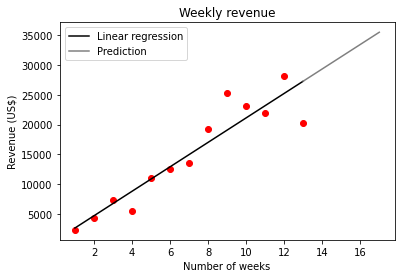

In [59]:
#chart shows existing data and future regression line
plt.scatter(x, y, color = 'red')
plt.plot(x, predicted_revenue, color = 'black', label = 'Linear regression')
plt.plot(x_future, future_revenue, color = 'grey', label = 'Prediction')
plt.legend()
plt.xlabel('Number of weeks')
plt.ylabel('Revenue (US$)')
plt.title('Weekly revenue')
plt.savefig('weekly revenue.jpg')

In [57]:
#prediction for 4 weeks' time
predict_future(17)

35496.263736263725

In [58]:
#checking R2 score - model is a good fit
r2_score(y, predict(x))

0.8625135183828527